# Repeated Anova

Repeated Anova is important for multiple, repeated measures of the same individuals on some variable

If there are 2 measures, then a dependent t-test would be fine. 

if there are 3 and more measures, then we'd counduct repeated measures of anova

Independent t-test is a simplified version of between-groups ANOVA

Dependent t-test is a simplified version of repeated measures ANOVA

Repeated ANOVA has pros and cons

#### Def between-group design:

is an experiment that has two or more groups of subjets tested by a different testing factor simultaneously.
  * Simplest example: 2 groups 1 control , 1 treatement group   to check statistical significance of a treatment

#### Def: within-group design (repeated measures design)

is an experiment which uses the same subjects with every testing factor, includind the control.

 * Simple example:  a longitudinal study in which change over time is assessed
  

### Experiment setup

A group of 20 individuals goes through 4 different trainings ( 8, 12,17 and 19 days). After each training each subject's IQ is measured.

In [28]:
## prepare a wm dataset working memory iq gain  for groups 8 days, 12days, 17 days, 19 days
condition<-c('8 days','8 days','8 days','8 days','8 days','8 days','8 days','8 days','8 days','8 days','8 days','8 days','8 days','8 days','8 days','8 days','8 days','8 days','8 days','8 days','12 days','12 days','12 days','12 days','12 days','12 days','12 days','12 days','12 days','12 days','12 days','12 days','12 days','12 days','12 days','12 days','12 days','12 days','12 days','12 days','17 days','17 days','17 days','17 days','17 days','17 days','17 days','17 days','17 days','17 days','17 days','17 days','17 days','17 days','17 days','17 days','17 days','17 days','17 days','17 days','19 days','19 days','19 days','19 days','19 days','19 days','19 days','19 days','19 days','19 days','19 days','19 days','19 days','19 days','19 days','19 days','19 days','19 days','19 days','19 days')
iq<-c(12.4,11.8,14.6,7.7,15.7,11.6,7,8.4,10.7,10.6,5.4,12.3,9.3,11,11.9,14.1,12.1,13.2,8.8,9.6,12.5,11.6,8.9,8.3,10.9,13.4,12.3,8.7,9.7,9.7,6.9,10.5,11.6,13.8,15.6,11.7,16.1,11.7,15,15.1,13.4,9.8,13.2,12.8,18.1,13.8,14.5,17.2,14.2,10.4,12,17.4,12.8,12.5,14.6,15.6,13.2,11.2,15.4,16,14,17,10.4,11.3,18.9,16.7,13.9,19.2,14.2,11.5,15.5,12.5,16.1,11.1,16.1,15.2,15.4,16.8,13.5,15.7)
subject <- rep(1:20,4) # this shows that each person did subsequent trainings of different  number of days
wm<-data.frame(subject=factor(subject), condition=factor(condition,levels=c('8 days', '12 days', '17 days', '19 days')),iq=iq)
#not the suage of factor() function on categorical independent variables

In [16]:
str(wm)

'data.frame':	80 obs. of  3 variables:
 $ subject  : Factor w/ 20 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ condition: Factor w/ 4 levels "12 days","17 days",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ iq       : num  12.4 11.8 14.6 7.7 15.7 11.6 7 8.4 10.7 10.6 ...


In [17]:
wm$subject <- factor(wm$subject)

In [18]:
library(psych)

In [19]:
describeBy(wm)  #summary statistics

Warning message:
In describeBy(wm): no grouping variable requested

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
subject*,1,80,10.5,5.802662,10.5,10.5,7.413,1,20,19,0,-1.250584,0.6487573
condition*,2,80,2.5,1.125088,2.5,2.5,1.4826,1,4,3,0,-1.400744,0.1257887
iq,3,80,12.81625,2.91115,12.65,12.85625,2.9652,5.4,19.2,13.8,-0.1148333,-0.4284716,0.3254765


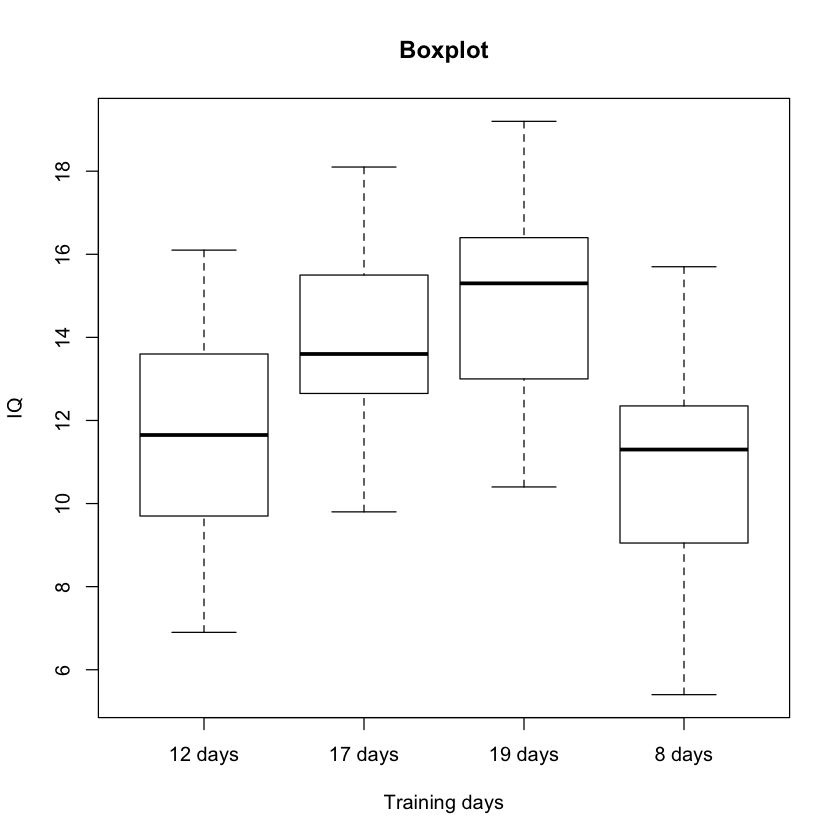

In [20]:
#boxplot of dependent (response) variable vs indpedendent (feature) variable 
boxplot(wm$iq ~ wm$condition, main="Boxplot", xlab="Training days", ylab="IQ")

In [21]:
library(ggplot2)

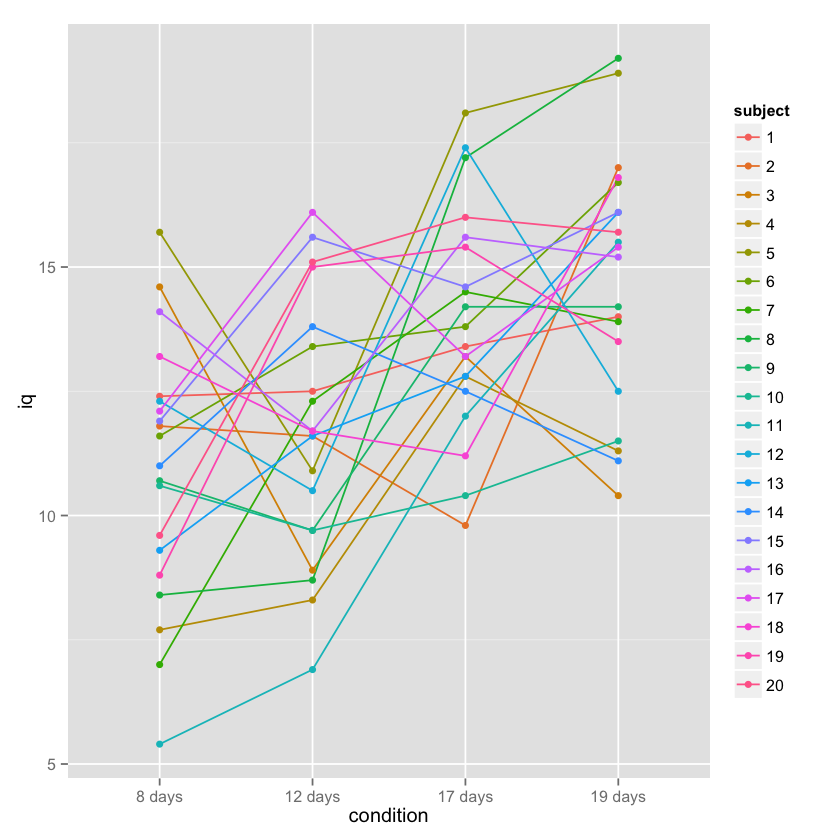

In [49]:
# plot shows an evolution of each subject iq over his/her specific training
ggplot(data = wm, aes(x = condition, y = iq, group = subject, colour = subject)) + 
  geom_line() + geom_point()

## Pros of repeated measures

* They cost less (fewer subjects required)
* Greater statistical power ! 
   * Individual subject variation is considered systematic variance and so is not part of error in F-test
* accounts for individual differences (between subjects)
    * stable individual difference reduces error term and increases a statistical power
    
More on statistical power.  Change in the nature of the erorr term or called unsystematic variance.  Subjects may consistently reveal individual differences. Say a participant who is not taking the experiment seriously, does not gain  an iq increase in the training. So such subject will not show an effect.

A repeated measures design  will take this vairability across subjects into account  and will see whether there is systematic variability that can attributed to the individual people




## Cons of repeated measures

* Order effects
    * adressed  by counterbalancing

* Missing data
   
   
#### counterblanancing
* Simple design with 2 conditions A1 and A2
* Blocked design: half of subjects are assigned (A1 then A2), another half (A2,A1)
  - if subject are randomly assigned to halfs than order is couterbalanced
* Randomized design: for each subject the order of conditions is randomized


### handling missing data

For any variable of interest $X$ create new variable $X_M$

$X_M=1$ if X is missing, $X_M = 0$ if X is not missing

Then conduct t-test with $X_M$ as independent variable.  If significant, X is NOT missing at random

* missing data remedies
    * drop all cases with one or moe missing data points
         * only od if you can afford to lose (lots of data)
    * keep all cases and estimate values of missing data points by using multiple regression to predict X based on values of Y



## Sphericity assumption

* Similar to homogeneity of variance assumption
* For design with 3 conditions A1,A2, & A3  variance of scores between A1 - A2 should be equal to variance of scores between A1 - A3  =  A2 - A3

Mauchly's test  tests this assumption (similar to Levene's Test)

If the test is significant then the sphericity is violated. Proceed with adjusting degrees of freedom using **Greenhouse-Geisser correction**.




In [32]:
# Define the iq data frame
iq <- cbind(wm$iq[wm$condition == "8 days"], 
            wm$iq[wm$condition == "12 days"], 
            wm$iq[wm$condition == "17 days"], 
            wm$iq[wm$condition == "19 days"]) 

# Make an mlm object
mlm <- lm(iq ~ 1)

# Mauchly's test
mauchly.test(mlm, x = ~ 1) 
#with p-value high ( > 0.05) the assumption of homogeneity of variances holds


	Mauchly's test of sphericity

data:  SSD matrix from lm(formula = iq ~ 1)
W = 0.81725, p-value = 0.9407


### calculating F-ratio for repeated measures 


$F=\frac{MS_A}{MS_{AxS}}$, with  $MS_A = SS_A/df_A$, and  $MS_{AxS}=SS_{AxS}/df_{AxS}$

Systematic sum of squaires $SS_A = n\sum(y_j - y_t)^2$  with $y_j$ are the group means and $y_t$ is  the grand mean and n is a number of subjects in each of the jth group. $df_A$ stands for degrees of freedom equal  number of groups j -1.

In [35]:
## towards computing F-ratio
#compute systematic variance
n<-20
y_j <- tapply(wm$iq,wm$condition, mean) # grouping by condition, 4 measures
y_t <-mean(wm$iq) # grand mean
ss_cond<-n*sum( (y_j-y_t)^2 )
df <- 4-1 # number of conditions -1
ms_cond <- ss_cond/df
print(ms_cond)

[1] 65.36379


In [36]:
#compute the subject variance 
n<-4 # # of conditions for each subject
y_j <- tapply(wm$iq, wm$subject,mean) #grouping by subject , 20 measures
y_t <-mean(wm$iq) # grand mean
ss_subjects <- n*sum( (y_j -y_t)^2 )
df<-20-1  #number of subjects -1
ms_subjects <- ss_subjects/df
print(ms_subjects)


[1] 9.242178


#####  the unsystematic within-groups variance or the error term of the betwen-groups design

Within groups sum of squares $ss_{s/a} = \sum(y_{ij} - y_j)^2$, where $y_{ij}$  are individual scores and $y_j$ are group means

In [37]:
#compute unsystematic within-gorups variance 
#create 4 subsets on cndition
y_i1 <- subset(wm$iq, wm$condition == "8 days")
y_i2 <- subset(wm$iq, wm$condition == "12 days")
y_i3 <- subset(wm$iq, wm$condition == "17 days")
y_i4 <- subset(wm$iq, wm$condition == "19 days")

#compute ss_s/a
s_1 <-  y_i1 - mean(y_i1)
s_2 <-  y_i2 - mean(y_i2) 
s_3 <-  y_i3 - mean(y_i3) 
s_4 <-  y_i4 - mean(y_i4) 

s_t <- c(s_1,s_2,s_3,s_4)
ss_sa <- sum(s_t^2)

df<-4*19  #  number of groups * ( numbe of subjects in group -1)
ms_sa <- ss_sa/df
print(ms_sa)


[1] 6.229178


In [39]:
## the unsystematic variance for the repeated measures design ( error term)
ss_rm <- ss_sa - ss_subjects # note the subsctraction
df<-3*19
ms_rm <- ss_rm /df
print(ms_rm)

[1] 5.224844


In [41]:
# compute F-value and p-value
f_rat <- ms_cond / ms_rm   ## systematic variance by error term
df1 <- 4-1
df2 <- (4-1)*(20-19)
p_val <- 1-pf(f_rat, df1, df2)
print(paste(f_rat,p_val)) ## f-rat is significant

[1] "12.5101893827945 0.0334171974045159"


### repeated measures anova in R aov()


In [42]:
model <- aov(wm$iq ~ wm$condition + Error(wm$subject / wm$condition) ) #Error() term because repeated measures

# Summary of model
print(summary(model)) # observe the same f_value f_rat and Pr(>F) p_val 


Error: wm$subject
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 19  175.6   9.242               

Error: wm$subject:wm$condition
             Df Sum Sq Mean Sq F value   Pr(>F)    
wm$condition  3  196.1   65.36   12.51 2.16e-06 ***
Residuals    57  297.8    5.22                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [45]:
#effect size 
# eta squared  is ss_a / ss_total
eta_sq <- ss_cond / (ss_cond + ss_rm)
print(eta_sq)

[1] 0.3970204


## Post-hoc tests

if F-ratio significant, follow-up with post-hoc tests

Many procedures available 

Different than in between-subjects ANOVA

Protect agains inflation of probability type I error (false positive)



In [47]:
# Post-hoc test: default procedure
with(wm, pairwise.t.test(iq, condition, paired = TRUE))


	Pairwise comparisons using paired t tests 

data:  iq and condition 

        8 days  12 days 17 days
12 days 0.40038 -       -      
17 days 0.00244 0.01955 -      
19 days 0.00054 0.00270 0.40038

P value adjustment method: holm 

In [48]:
#with conservative bonferoni
with(wm, pairwise.t.test(iq, condition, p.adjust.method='bonferroni',paired = TRUE, ))


	Pairwise comparisons using paired t tests 

data:  iq and condition 

        8 days  12 days 17 days
12 days 1.00000 -       -      
17 days 0.00293 0.03910 -      
19 days 0.00054 0.00405 1.00000

P value adjustment method: bonferroni 